# **PACE Stages**: **The Project Framework**

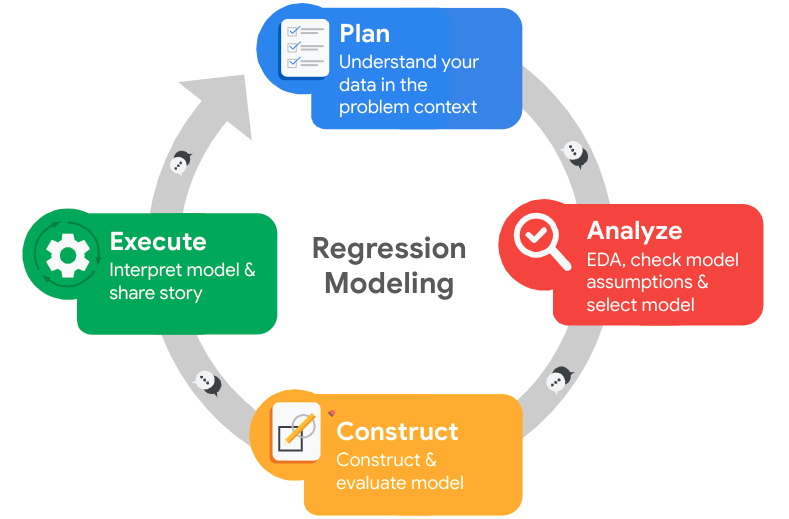

# Pace: Plan Stage

## **Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: **What’s likely to make the employee leave the company?**

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

### Import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# For saving models
import pickle

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,\
                            confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve

### Load dataset

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
df0.describe(include= "all").T

count unique    top  freq        mean        std  \
satisfaction_level     14999.0    NaN    NaN   NaN    0.612834   0.248631   
last_evaluation        14999.0    NaN    NaN   NaN    0.716102   0.171169   
number_project         14999.0    NaN    NaN   NaN    3.803054   1.232592   
average_montly_hours   14999.0    NaN    NaN   NaN  201.050337  49.943099   
time_spend_company     14999.0    NaN    NaN   NaN    3.498233   1.460136   
Work_accident          14999.0    NaN    NaN   NaN     0.14461   0.351719   
left                   14999.0    NaN    NaN   NaN    0.238083   0.425924   
promotion_last_5years  14999.0    NaN    NaN   NaN    0.021268   0.144281   
Department               14999     10  sales  4140         NaN        NaN   
salary                   14999      3    low  7316         NaN        NaN   

                        min    25%    50%    75%    max  
satisfaction_level     0.09   0.44   0.64   0.82    1.0  
last_evaluation        0.36   0.56   0.72   0.87    1.0  
number_project          2.0    3.0    4.0    5.0    7.0  
average_montly_hours   96.0  156.0  200.0  245.0  310.0  
time_spend_company      2.0    3.0    3.0    4.0   10.0  
Work_accident           0.0    0.0    0.0    0.0    1.0  
left                    0.0    0.0    0.0    0.0    1.0  
promotion_last_5years   0.0    0.0    0.0    0.0    1.0  
Department              NaN    NaN    NaN    NaN    NaN  
salary                  NaN    NaN    NaN    NaN    NaN

### Rename columns

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns= {"average_montly_hours": "average_monthly_hours",\
                           "number_project": "num_projects", "time_spend_company": "tenure_company",\
                           "Work_accident": "work_accident", "left": "employee_left", "Department": "department"})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'average_monthly_hours', 'tenure_company', 'work_accident',
       'employee_left', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
df0.isna().any(axis= 0).sum()

0

### Check duplicates

In [8]:
df0.duplicated().sum()

3008

In [9]:
df0[df0.duplicated()]

satisfaction_level  last_evaluation  num_projects  \
396                  0.46             0.57             2   
866                  0.41             0.46             2   
1317                 0.37             0.51             2   
1368                 0.41             0.52             2   
1461                 0.42             0.53             2   
...                   ...              ...           ...   
14994                0.40             0.57             2   
14995                0.37             0.48             2   
14996                0.37             0.53             2   
14997                0.11             0.96             6   
14998                0.37             0.52             2   

       average_monthly_hours  tenure_company  work_accident  employee_left  \
396                      139               3              0              1   
866                      128               3              0              1   
1317                     127               3              0              1   
1368                     132               3              0              1   
1461                     142               3              0              1   
...                      ...             ...            ...            ...   
14994                    151               3              0              1   
14995                    160               3              0              1   
14996                    143               3              0              1   
14997                    280               4              0              1   
14998                    158               3              0              1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [10]:
df = df0.drop_duplicates(keep= "first")
df.reset_index(drop= True, inplace= True)

df.shape

(11991, 10)

### Check outliers

In [11]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

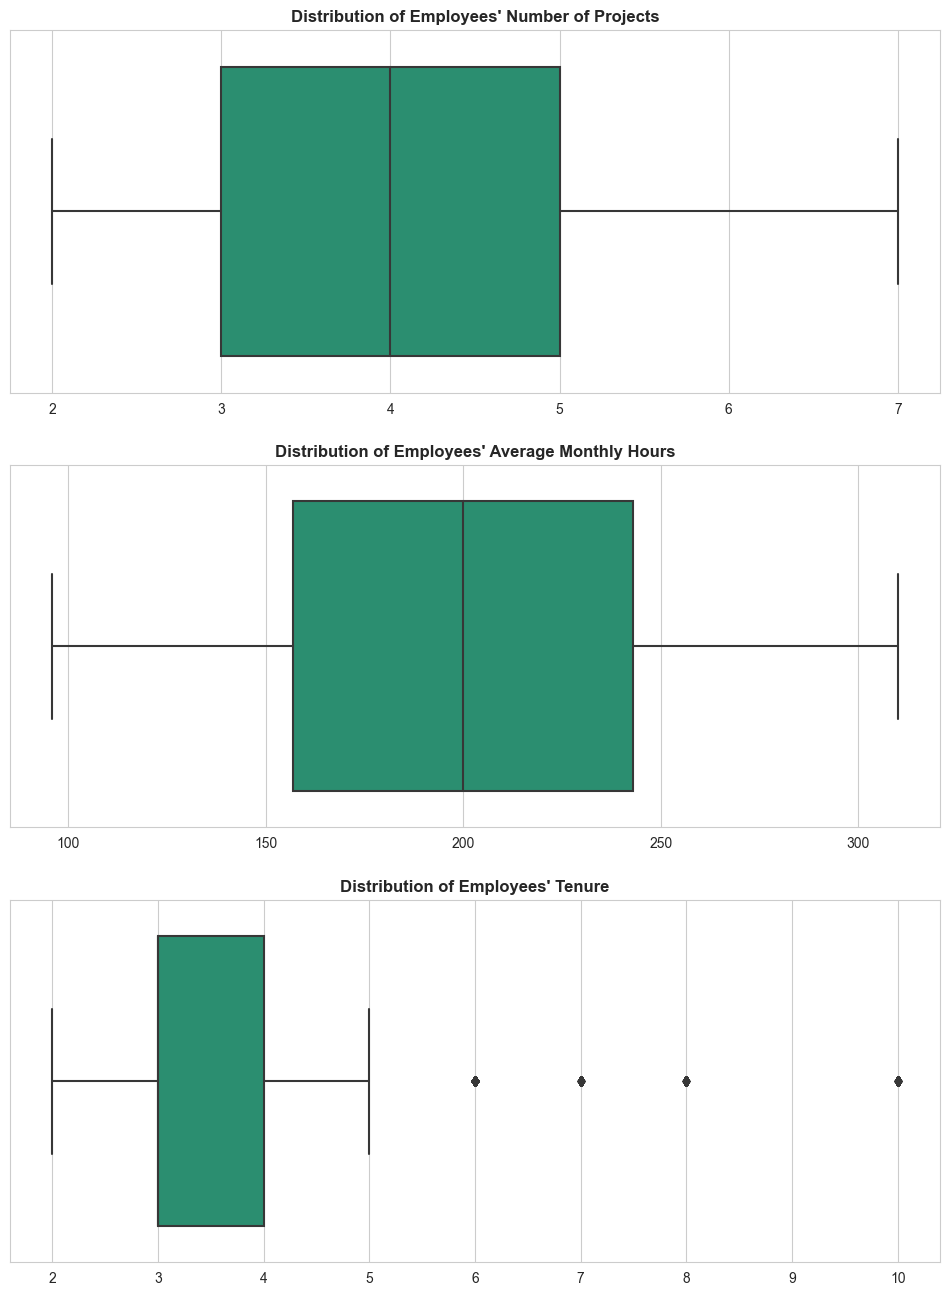

In [12]:
fig, ax = plt.subplots(3, 1, figsize= (12, 16))

sns.boxplot(x= df["num_projects"], showfliers= True, ax= ax[0])
ax[0].set_title("Distribution of Employees' Number of Projects", fontsize= 12, fontweight= "bold")
ax[0].set_xlabel("")

sns.boxplot(x= df["average_monthly_hours"], showfliers= True, ax= ax[1])
ax[1].set_title("Distribution of Employees' Average Monthly Hours", fontsize= 12, fontweight= "bold")
ax[1].set_xlabel("")

sns.boxplot(x= df["tenure_company"], showfliers= True, ax= ax[2])
ax[2].set_title("Distribution of Employees' Tenure", fontsize= 12, fontweight= "bold")
ax[2].set_xlabel("")

plt.show()

In [13]:
percentile_25 = df["tenure_company"].quantile(0.25)

percentile_75 = df["tenure_company"].quantile(0.75)

iqr = percentile_75 - percentile_25

upper_limit = percentile_75 + 1.5 * iqr
print("Upper Limit =", upper_limit)

lower_limit = percentile_25 - 1.5 * iqr
print("Lower Limit =", lower_limit)

outliers = df[df["tenure_company"] > upper_limit]
print("\nNumber of outliers in the employees' tenure feature =", len(outliers))

Upper Limit = 5.5
Lower Limit = 1.5

Number of outliers in the employees' tenure feature = 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage

## Step 2. Data Exploration (Continue EDA)

In [14]:
print("Percentage of left and stayed employees:\n", round(df["employee_left"].value_counts(normalize= True) * 100, 2))

Percentage of left and stayed employees:
 0    83.4
1    16.6
Name: employee_left, dtype: float64


In [15]:
print("Percentage of Employees who experienced Working Accident:\n", round(df["work_accident"].value_counts(normalize= True) * 100, 1))

Percentage of Employees who experienced Working Accident:
 0    84.6
1    15.4
Name: work_accident, dtype: float64


In [16]:
print("Percentage of Employees who promoted within the last 5 years:\n", round(df["promotion_last_5years"].value_counts(normalize= True) * 100, 1))

Percentage of Employees who promoted within the last 5 years:
 0    98.3
1     1.7
Name: promotion_last_5years, dtype: float64


### **Data Visualizations**

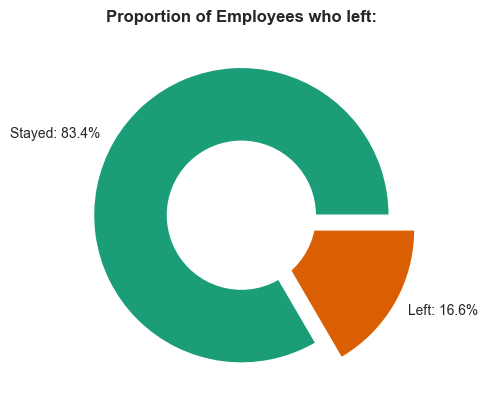

In [17]:
plt.pie(df["employee_left"].value_counts(), labels= ["Stayed: 83.4%", "Left: 16.6%"], explode= [0, 0.2])
my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Proportion of Employees who left:", fontweight= "bold")
plt.show()

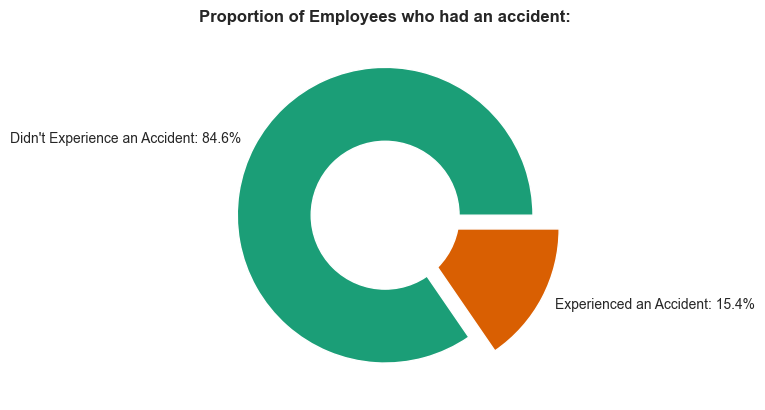

In [18]:
plt.pie(df["work_accident"].value_counts(), labels= ["Didn't Experience an Accident: 84.6%", "Experienced an Accident: 15.4%"], explode= [0, 0.2])
my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Proportion of Employees who had an accident:", fontweight= "bold")
plt.show()

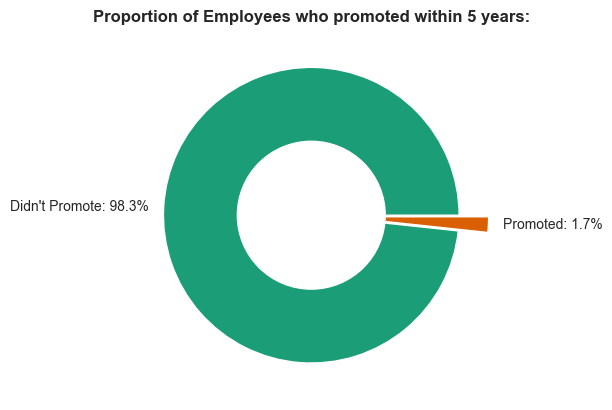

In [19]:
plt.pie(df["promotion_last_5years"].value_counts(), labels= ["Didn't Promote: 98.3%", "Promoted: 1.7%"], explode= [0, 0.2])
my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Proportion of Employees who promoted within 5 years:", fontweight= "bold")
plt.show()

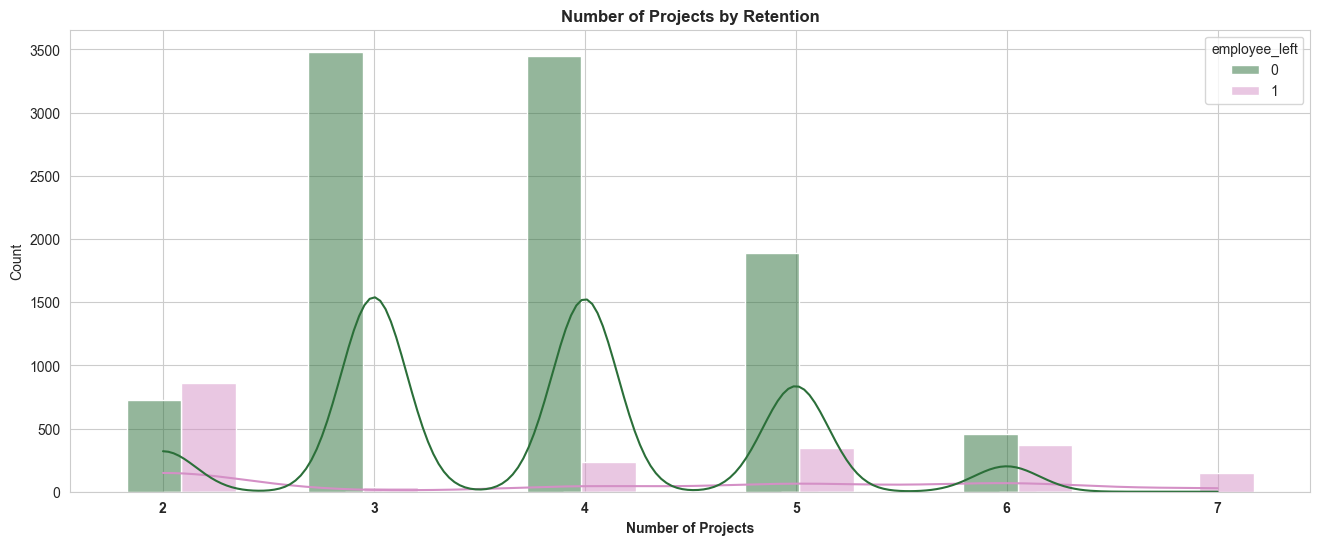

In [20]:
plt.figure(figsize= (16, 6))
sns.histplot(data= df, x= "num_projects", shrink= 3, hue= "employee_left", multiple= "dodge", palette= "cubehelix", kde= True)
plt.title("Number of Projects by Retention", fontsize= 12, fontweight= "bold")

plt.xlabel("Number of Projects", fontsize= 10, fontweight= "bold")
plt.xticks(fontweight= "bold")
plt.show()

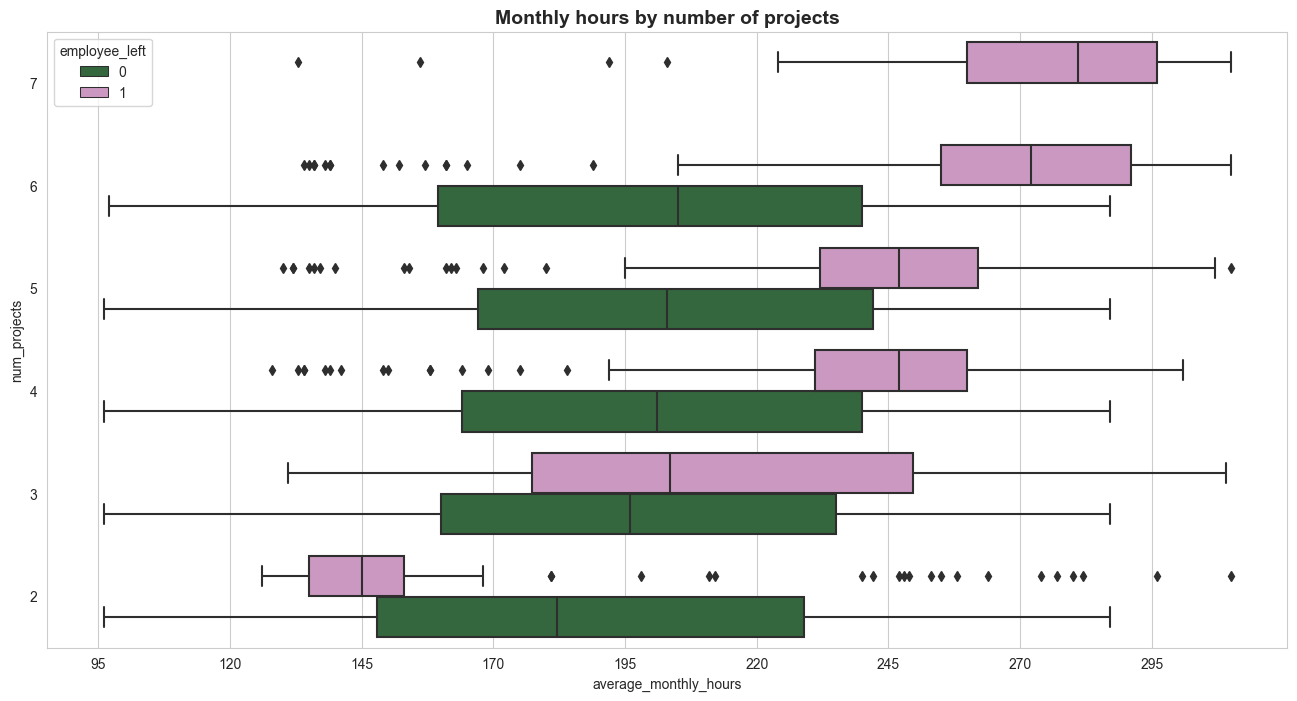

In [21]:
plt.figure(figsize= (16, 8))
box = sns.boxplot(data=df, x='average_monthly_hours', y='num_projects', hue='employee_left', orient="h", palette= "cubehelix")
box.invert_yaxis()

plt.title('Monthly hours by number of projects', fontsize= 14, fontweight= "bold")
plt.xticks(range(95, 311, 25))
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot:

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~250–295 hours/month much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn’t leave the company—worked considerably more hours than this. **It seems that employees here are
overworked.**

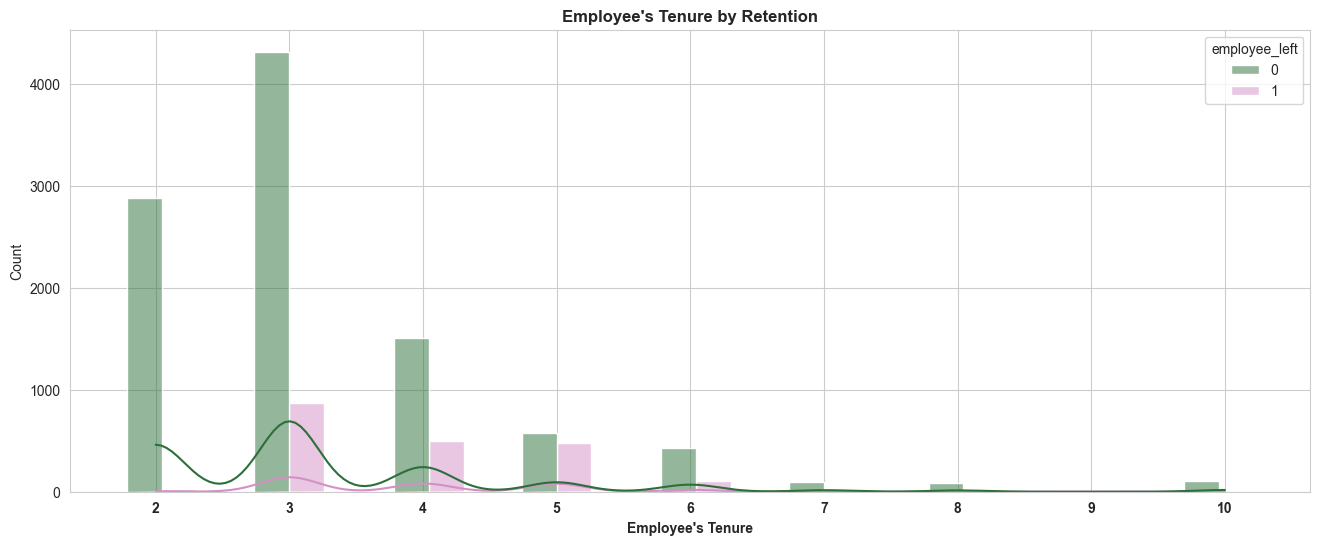

In [22]:
plt.figure(figsize= (16, 6))
sns.histplot(data= df, x= "tenure_company", shrink= 6, hue= "employee_left", multiple= "dodge", palette= "cubehelix", kde= True)
plt.title("Employee's Tenure by Retention", fontsize= 12, fontweight= "bold")

plt.xlabel("Employee's Tenure", fontsize= 10, fontweight= "bold")
plt.xticks(range(2, 11, 1), fontweight= "bold")
plt.show()

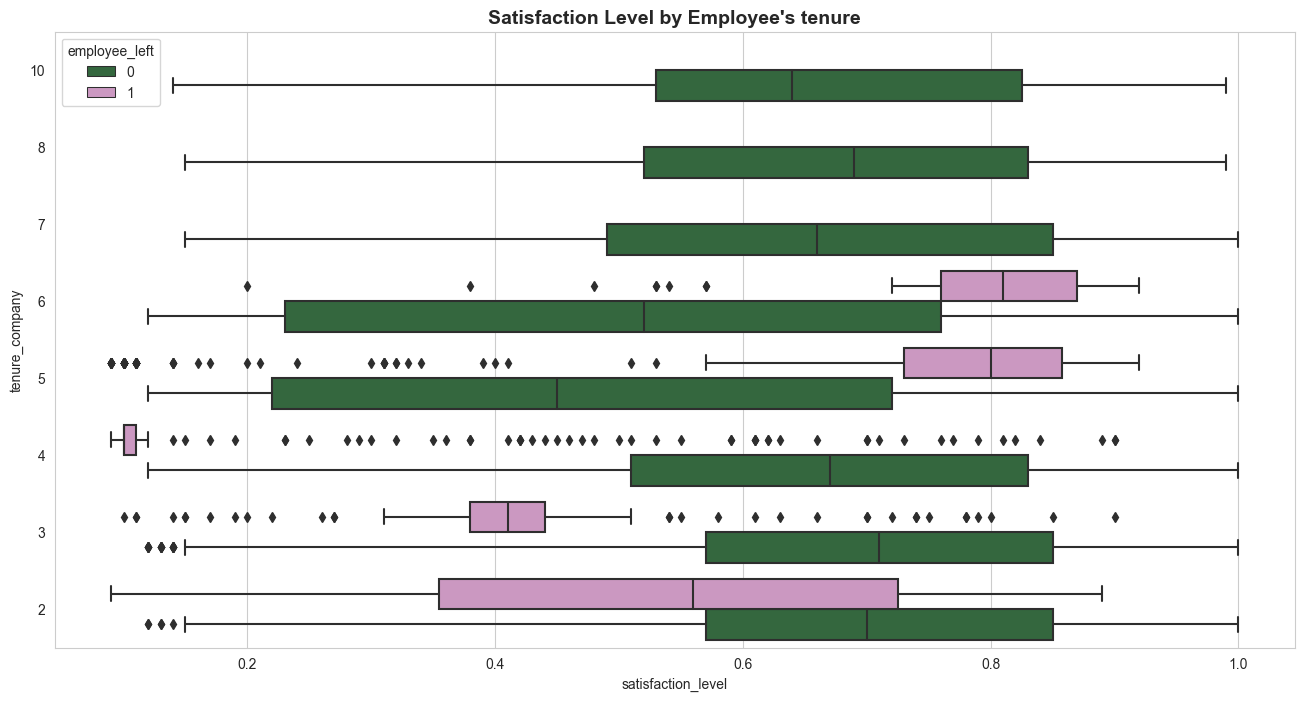

In [23]:
plt.figure(figsize= (16, 8))
box = sns.boxplot(data=df, x='satisfaction_level', y='tenure_company', hue='employee_left', orient="h", palette= "cubehelix")
box.invert_yaxis()

plt.title("Satisfaction Level by Employee's tenure", fontsize= 14, fontweight= "bold")
plt.show()

There are many observations you could make from this plot:

> Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

> Four-year employees who left seem to have an unusually low satisfaction level. It’s worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

> The longest-tenured employees didn’t leave. Their satisfaction levels aligned with those of newer employees who stayed.

> The histogram shows that there are relatively few longer-tenured employees. It’s possible that they’re the higher-ranking, higher-paid employees.

In [24]:
department_left = round(df.groupby(["department"])["employee_left"].value_counts(normalize= True), 2)

department_left = pd.DataFrame(department_left).rename(columns= {"employee_left": "percentage"}).reset_index(drop= False)

department_left.head(3)

department  employee_left  percentage
0         IT              0        0.84
1         IT              1        0.16
2      RandD              0        0.88

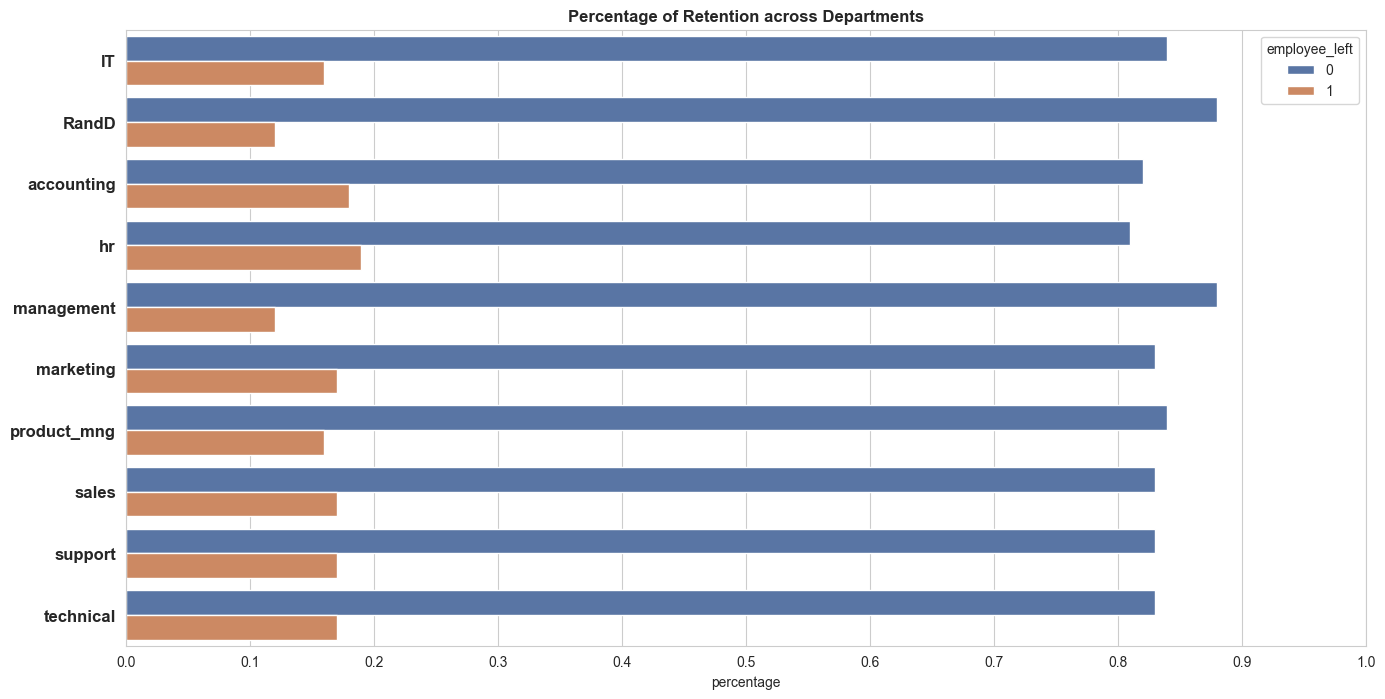

In [25]:
plt.figure(figsize= (16, 8))
sns.barplot(data= department_left, x="percentage", y= "department", hue= "employee_left", palette= "deep")
plt.title("Percentage of Retention across Departments", fontsize= 12, fontweight= "bold")

plt.ylabel("")
plt.yticks(fontsize= 12, fontweight= "bold")
plt.xticks(list(x/10 for x in range(0, 11)))
plt.show()

**There doesn’t seem to be any department that differs significantly in its proportion of employees 
who left to those who stayed**.

In [26]:
salary_left = round(df.groupby(["salary"])["employee_left"].value_counts(normalize= True), 2)

salary_left = pd.DataFrame(salary_left).rename(columns= {"employee_left": "percentage"}).reset_index(drop= False)

salary_left

salary  employee_left  percentage
0    high              0        0.95
1    high              1        0.05
2     low              0        0.80
3     low              1        0.20
4  medium              0        0.85
5  medium              1        0.15

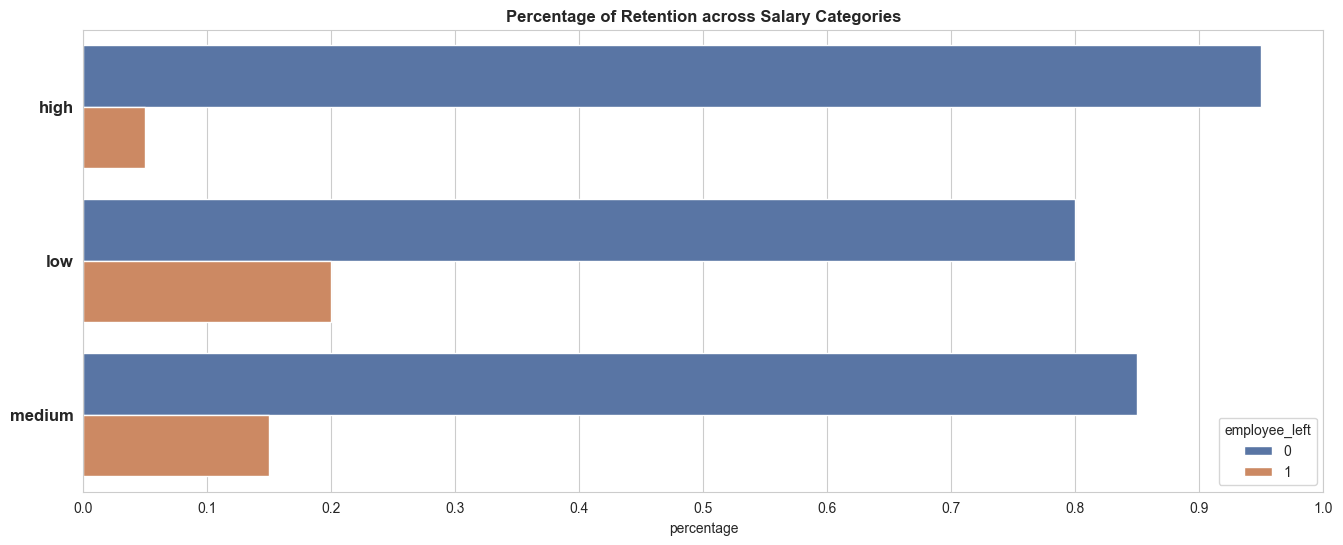

In [27]:
plt.figure(figsize= (16, 6))
sns.barplot(data= salary_left, x= "percentage", y= "salary", hue= "employee_left", palette= "deep")
plt.title("Percentage of Retention across Salary Categories", fontsize= 12, fontweight= "bold")

plt.ylabel("")
plt.yticks(fontsize= 12, fontweight= "bold")
plt.xticks(list(x/10 for x in range(0, 11)))
plt.show()

**From the barplot above, we can easily observe that proportion of the high salary category is quite lower than other categories.**

In [28]:
department_salary = round(df.groupby(["department"])["salary"].value_counts(normalize= True), 2)

department_salary = pd.DataFrame(department_salary).rename(columns= {"salary": "percentage"}).reset_index(drop= False)

department_salary.head(3)

department  salary  percentage
0         IT     low        0.49
1         IT  medium        0.44
2         IT    high        0.07

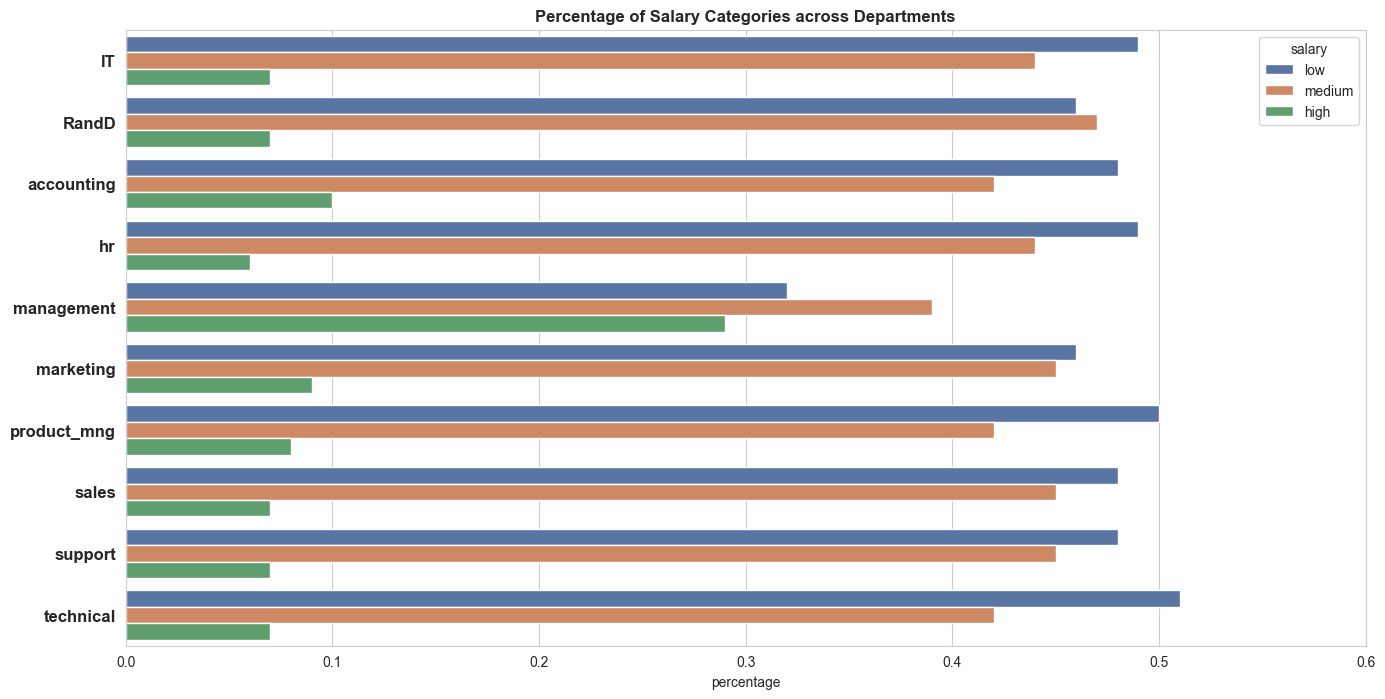

In [29]:
plt.figure(figsize= (16, 8))
sns.barplot(data= department_salary, x= "percentage", y= "department", hue= "salary", palette= "deep")
plt.title("Percentage of Salary Categories across Departments", fontsize= 12, fontweight= "bold")

plt.ylabel("")
plt.yticks(fontsize= 12, fontweight= "bold")
plt.xticks(list(x/10 for x in range(0, 7)))
plt.show()

**From the garph above, we can compare the departments across salary categories. The distribution is normal and homogenous except for the management department, but that being expected.**

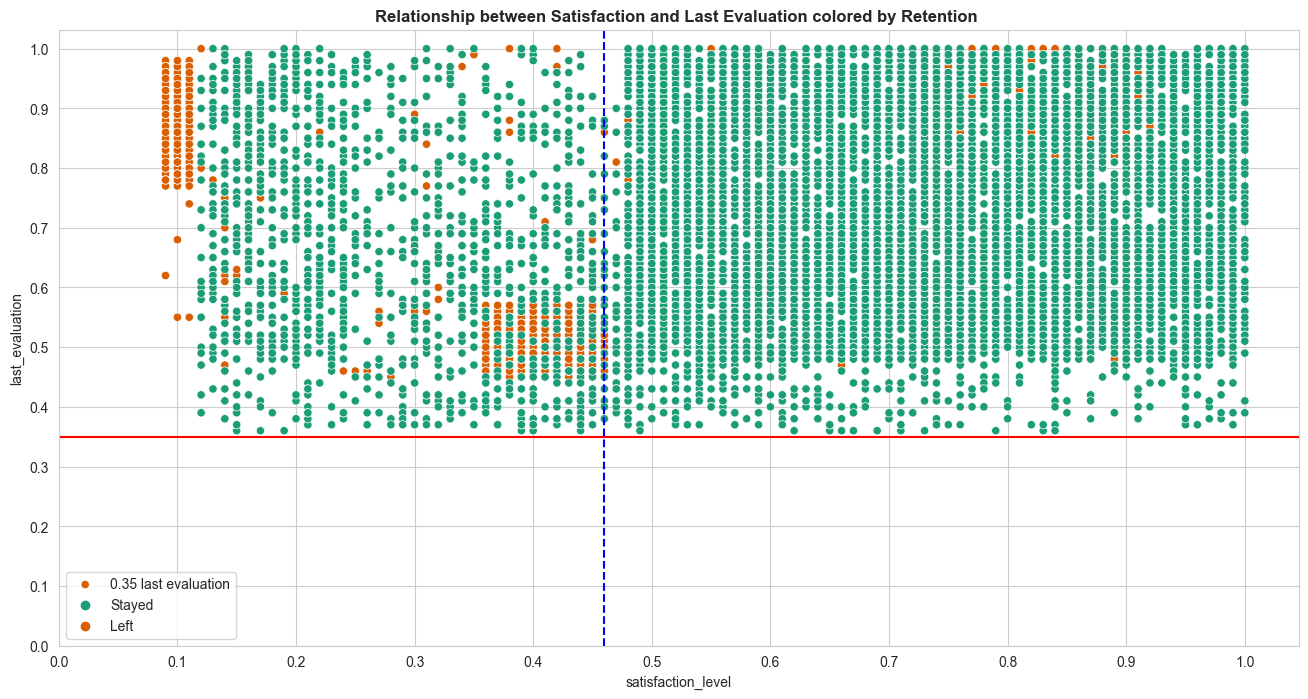

In [30]:
plt.figure(figsize= (16, 8))
sns.scatterplot(data= df, x= "satisfaction_level", y= "last_evaluation", hue= "employee_left")
plt.title("Relationship between Satisfaction and Last Evaluation colored by Retention ", fontsize= 12, fontweight= "bold")

plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.axvline(x= 0.46, color= "blue", label= "0.46 Satisfaction Level", ls= "dashed")
plt.axhline(y= 0.35, color= "red", label= "0.35 last evaluation", ls= "solid")
plt.legend(["0.35 last evaluation", "Stayed", "Left"])
plt.show()

The scatterplot above shows that all the employees had last evaluation of more than 0.35, which seems unrealistic at all.

Finally, we could observe that after the vertical line at 0.46 satisfaction level, the percentage of left employees become significantly low.

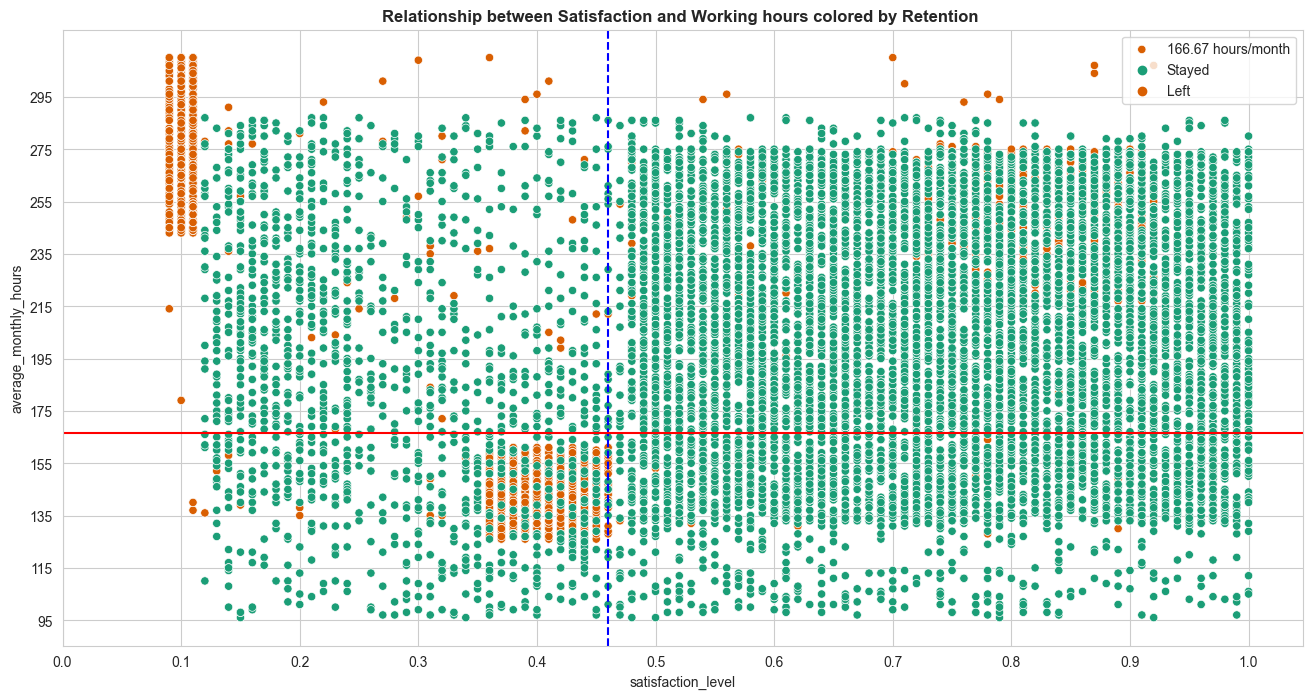

In [31]:
plt.figure(figsize= (16, 8))
sns.scatterplot(data= df, x= "satisfaction_level", y= "average_monthly_hours", hue= "employee_left")
plt.title("Relationship between Satisfaction and Working hours colored by Retention ", fontsize= 12, fontweight= "bold")

plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.yticks(range(95, 311, 20))
plt.axvline(x= 0.46, color= "blue", label= "0.46 Satisfaction Level", ls= "dashed")
plt.axhline(y= 166.67, color= "red", label= "166.67 hours/month", ls= "solid")
plt.legend(["166.67 hours/month", "Stayed", "Left"])
plt.show()

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It’s likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It’s difficult to speculate about why they might have left. It’s possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

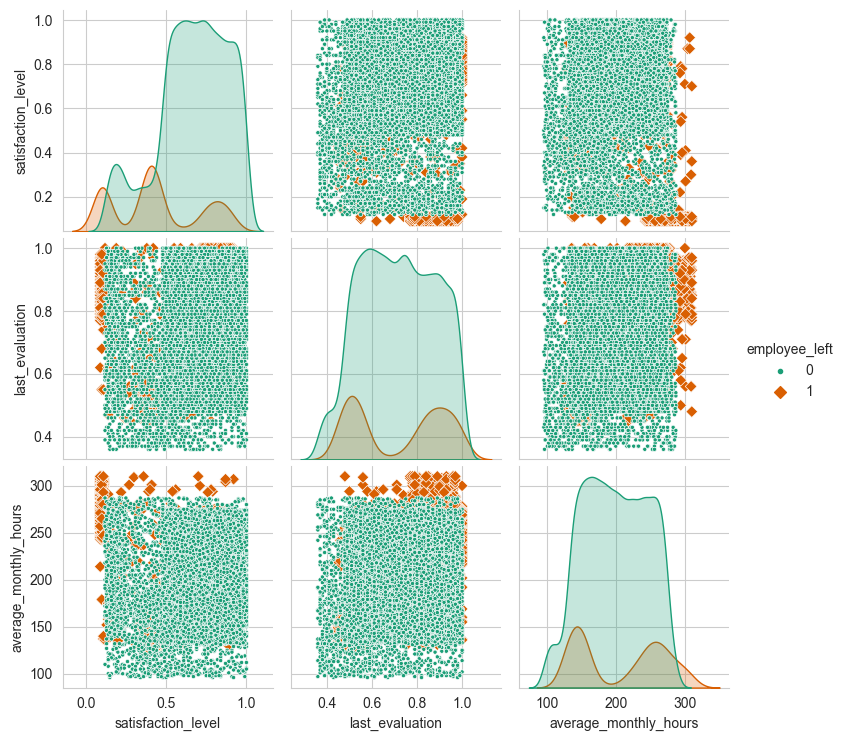

In [32]:
sns.pairplot(data= df[["satisfaction_level", "last_evaluation", "average_monthly_hours", "employee_left"]],\
             hue= "employee_left", diag_kind= "kde", markers= [".", "D"])

plt.show()

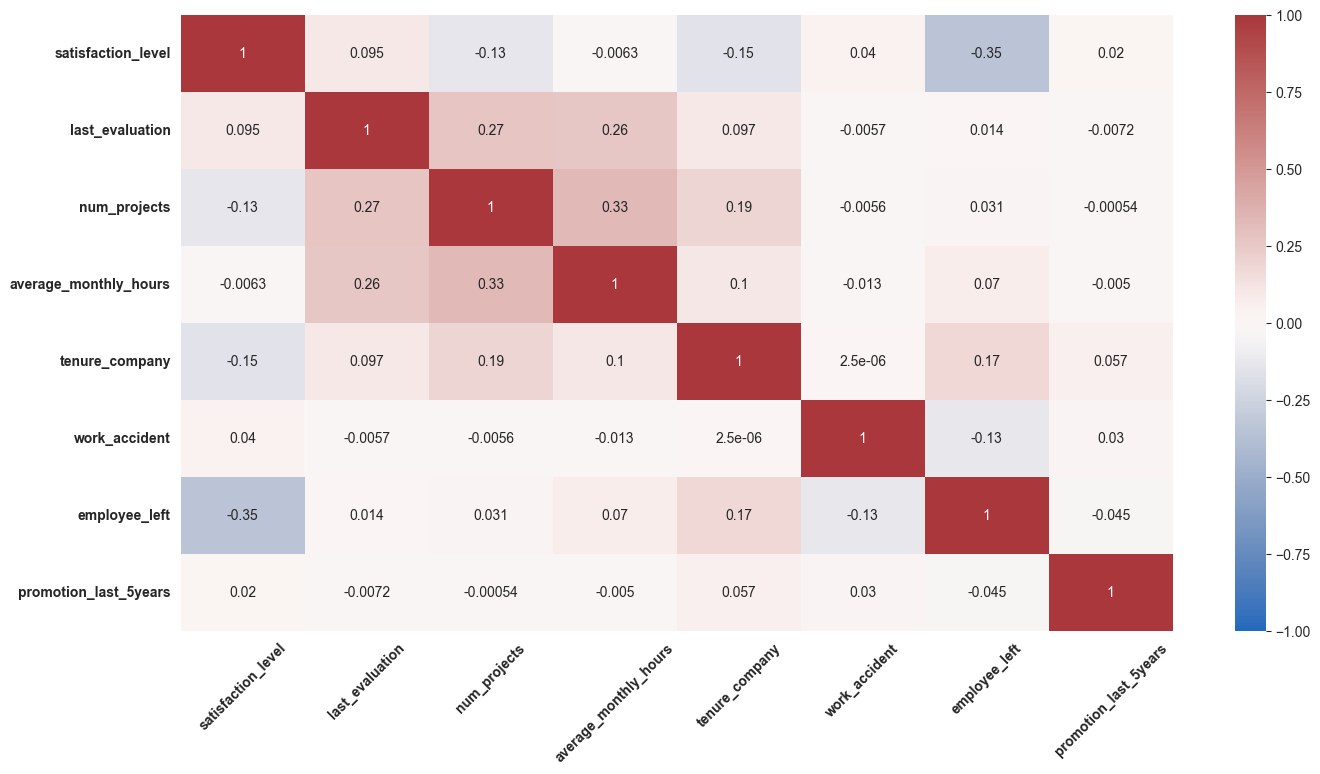

In [33]:
plt.figure(figsize= (16, 8))
sns.heatmap(data= df.corr(numeric_only= True), vmin= -1, vmax= 1, cmap= "vlag", annot= True)
plt.xticks(rotation= 45, fontweight= "bold")
plt.yticks(fontweight= "bold")
plt.show()

The correlation heatmap confirms that the number of projects, monthly working hours, employee's tenure, and evaluation scores all have some positive correlation with the employee turn-over rate, while turn-over rate is negatively correlated with their satisfaction level, whether employee have promoted and whether he had an accident or not.

Note that that correlation heatmap excludes both the department and the salary of the employee.

# paCe: Construct Stage

## Step 3. Model Building

### Identify the type of prediction task.

Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn’t leave).).


### Identify the types of models most appropriate for this task.

Since the variable you want to predict (whether an employee leaves the company) is categorical, 
you could either build a Logistic Regression model, or a Tree-based Machine Learning model


### Feature engineering: Feature transformation

#### Label encoding the ordinal feature `salary`

In [34]:
df_enc = df.copy()
df_enc["salary"] = df_enc["salary"].astype("category")
df_enc["salary"] = df_enc["salary"].cat.set_categories(["low", "medium", "high"]).cat.codes

df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   num_projects           11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure_company         11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   employee_left          11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  int8   
dtypes: float64(2), int64(6), int8(1), object(1)
memory usage: 855.0+ KB


#### One-hot encoding the nominal feature `department`

In [35]:
df_enc = pd.get_dummies(df_enc, drop_first= False)

df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   num_projects            11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure_company          11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   employee_left           11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int8   
 9   department_IT           11991 non-null  uint8  
 10  department_RandD        11991 non-null  uint8  
 11  department_accounting   11991 non-null  uint8  
 12  department_hr           11991 non-null  uint8  
 13  department_management   11991 non-null  uint8  
 14  department_marketing    11991 non-null

### **Modeling Approach [A]: Logistic regression model**

#### Removing the outliers (824 observations) that greater than 5.5 years from `tenure_company`

In [36]:
df_enc_removed = df_enc[df_enc["tenure_company"] <= upper_limit]

df_enc_removed.shape

(11167, 19)

#### Splitting the data into 75% training data & 25% testing data

In [37]:
X = df_enc_removed.copy()

X = df_enc_removed.drop("employee_left", axis= 1)

y = df_enc_removed["employee_left"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 17)

#### Performing oversampling to the minority class to overcome the class imbalance
**From 20% to 50%**

In [39]:
# Initial class distribution in the training set
print("Original class distribution in training set:", Counter(y_train))

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy= 0.5, random_state= 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# New class distribution after resampling
print("Resampled class distribution in training set:", Counter(y_resampled))

Original class distribution in training set: Counter({0: 6964, 1: 1411})
Resampled class distribution in training set: Counter({0: 6964, 1: 3482})


#### Instantiating and fitting the logistic regression model

In [40]:
%%time

logreg_clf = LogisticRegression(max_iter= 500, random_state= 17)

logreg_clf.fit(X_resampled, y_resampled)

CPU times: total: 62.5 ms
Wall time: 310 ms


LogisticRegression(max_iter=500, random_state=17)

In [41]:
y_pred_logreg = logreg_clf.predict(X_test)

#### Evaluating the logistic regression model

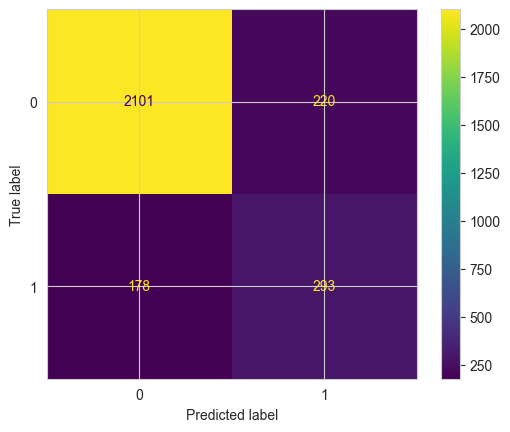

In [42]:
cm = confusion_matrix(y_test, y_pred_logreg, labels= logreg_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= logreg_clf.classes_)

disp.plot(values_format= "")
plt.show()

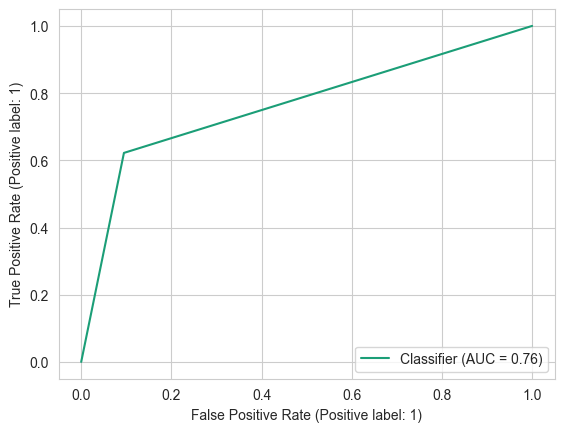

roc_auc_score: 0.7636


In [43]:
RocCurveDisplay.from_predictions(y_test, y_pred_logreg)
plt.show()

print("roc_auc_score:", round(roc_auc_score(y_test, y_pred_logreg), 4))

In [44]:
target_names = ["Predicted wouldn't leave", "Predicted would leave"]

print(classification_report(y_test, y_pred_logreg, target_names= target_names))

                          precision    recall  f1-score   support

Predicted wouldn't leave       0.92      0.91      0.91      2321
   Predicted would leave       0.57      0.62      0.60       471

                accuracy                           0.86      2792
               macro avg       0.75      0.76      0.75      2792
            weighted avg       0.86      0.86      0.86      2792



The classification report above shows that the logistic regression model achieved a precision of 86%, recall of 86%, f1-score of 86% (all weighted averages), and accuracy of 86%. However, if it’s most important to predict employees who leave, then the scores are significantly low.


### **Modeling Approach [B]: Decision Tree model: Round 1**

#### Splitting the data into 75% training data & 25% testing data

In [45]:
X = df_enc.copy()

X = df_enc.drop("employee_left", axis= 1)

y = df_enc["employee_left"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 17)

#### Performing oversampling to the minority class to overcome the class imbalance
**From 20% to 50%**

In [48]:
# Initial class distribution in the training set
print("Original class distribution in training set:", Counter(y_train))

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy= 0.5, random_state= 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# New class distribution after resampling
print("Resampled class distribution in training set:", Counter(y_resampled))

Original class distribution in training set: Counter({0: 7500, 1: 1493})
Resampled class distribution in training set: Counter({0: 7500, 1: 3750})


#### Identifying the optimal decision tree model

In [49]:
tree_clf = DecisionTreeClassifier(random_state= 17)

cv_params = {"max_depth": [4, 5, 6, 7, 8, 9, 10, 11], "min_samples_leaf": [2, 3, 4, 5, 6, 7]}

scoring = ["f1", "precision", "recall", "accuracy", "roc_auc"]

tree_cv_1 = GridSearchCV(estimator= tree_clf, param_grid= cv_params, scoring= scoring, cv= 5, refit= "roc_auc", n_jobs= -1, verbose= 1)

In [50]:
%%time

tree_cv_1.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 406 ms
Wall time: 3.75 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
             refit='roc_auc',
             scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'],
             verbose=1)

In [51]:
print("Best Parameters for the Decision Tree Model:\n", tree_cv_1.best_params_)

print("\nBest Avgerage Cross-validation ROC-AUC-score:", "%.3f" % tree_cv_1.best_score_)

Best Parameters for the Decision Tree Model:
 {'max_depth': 6, 'min_samples_leaf': 7}

Best Avgerage Cross-validation ROC-AUC-score: 0.977


In [52]:
def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc', 'precision': 'mean_test_precision', 'recall': 'mean_test_recall',\
                   'f1': 'mean_test_f1', 'accuracy': 'mean_test_accuracy'}

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'Model': [model_name], 'Precision': [precision], 'Recall': [recall], 'F1': [f1], 'Accuracy': [accuracy], 'AUC': [auc]})
    
    return table

In [53]:
decision_tree_results = make_results("Decision Tree CV", tree_cv_1, "auc")

decision_tree_results

Model  Precision    Recall        F1  Accuracy       AUC
0  Decision Tree CV   0.981662  0.912267  0.945675  0.965067  0.976751

**All of these scores from the decision tree model are strong indicators of good model performance.**

#### Instantiating and fitting the optimal decision tree model

In [54]:
%%time

tree_clf_1 = DecisionTreeClassifier(max_depth= 6, min_samples_leaf= 7, random_state= 17)

tree_clf_1.fit(X_resampled, y_resampled)

CPU times: total: 15.6 ms
Wall time: 19.4 ms


DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, random_state=17)

In [55]:
y_pred_tree_1 = tree_clf_1.predict(X_test)

#### Evaluating the decision tree model

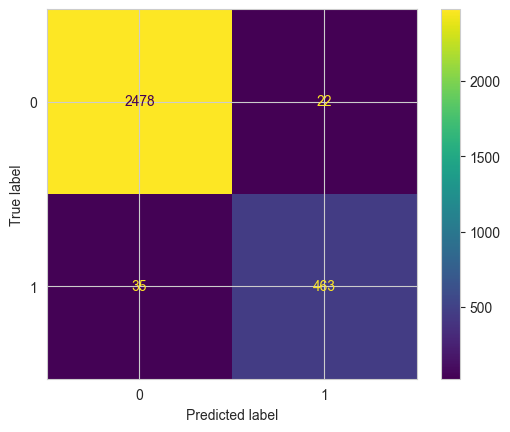

In [56]:
cm = confusion_matrix(y_test, y_pred_tree_1, labels= tree_clf_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= tree_clf_1.classes_)

disp.plot(values_format= "")
plt.show()

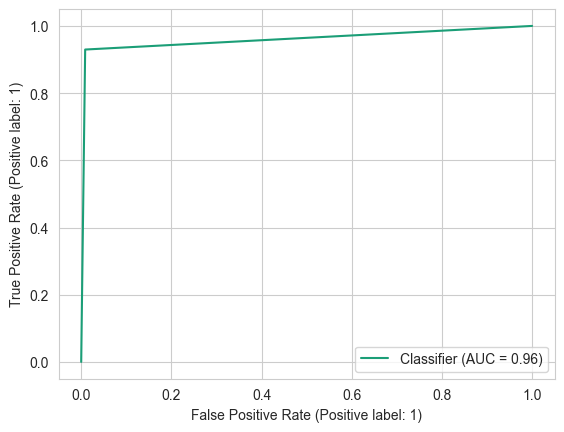

roc_auc_score: 0.9605


In [57]:
RocCurveDisplay.from_predictions(y_test, y_pred_tree_1)
plt.show()

print("roc_auc_score:", round(roc_auc_score(y_test, y_pred_tree_1), 4))

In [58]:
target_names = ["Predicted wouldn't leave", "Predicted would leave"]

print(classification_report(y_test, y_pred_tree_1, target_names= target_names))

                          precision    recall  f1-score   support

Predicted wouldn't leave       0.99      0.99      0.99      2500
   Predicted would leave       0.95      0.93      0.94       498

                accuracy                           0.98      2998
               macro avg       0.97      0.96      0.97      2998
            weighted avg       0.98      0.98      0.98      2998



The classification report above shows that the decision tree model achieved a precision of 98%, recall of 98%, f1-score of 98% (all weighted averages), and accuracy of 98%. That's a perfect model.


### **Modeling Approach [C]: Random forest model: Round 1**

#### Splitting the data into 75% training data & 25% testing data

In [59]:
X = df_enc.copy()

X = df_enc.drop("employee_left", axis= 1)

y = df_enc["employee_left"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 17)

#### Performing oversampling to the minority class to overcome the class imbalance
**From 20% to 50%**

In [61]:
# Initial class distribution in the training set
print("Original class distribution in training set:", Counter(y_train))

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy= 0.5, random_state= 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# New class distribution after resampling
print("Resampled class distribution in training set:", Counter(y_resampled))

Original class distribution in training set: Counter({0: 7500, 1: 1493})
Resampled class distribution in training set: Counter({0: 7500, 1: 3750})


#### Identifying the optimal random forest model

In [62]:
ranfor_clf = RandomForestClassifier(random_state= 17)

cv_params = {"max_depth": [4, 5, 6, 7, 8, 9, 10, 11], "min_samples_leaf": [2, 3, 4, 5, 6, 7],\
             "max_features": [0.6, 0.8, 1], "max_samples": [0.6, 0.8, 1], "n_estimators": [100, 150, 200, 250]}

scoring = ["f1", "precision", "recall", "accuracy", "roc_auc"]

ranfor_cv_1 = GridSearchCV(estimator= ranfor_clf, param_grid= cv_params, scoring= scoring, cv= 5, refit= "roc_auc", n_jobs= -1, verbose= 1)

In [63]:
#%%time

#ranfor_cv_1.fit(X_resampled, y_resampled)

In [64]:
path = "D:/Google Advanced Data Analytics/ADA_Capstone/Fitted_Models/"

In [65]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [66]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [67]:
# Write Pickle
#write_pickle(path, ranfor_cv_1, "hr_ranfor_cv_1")

In [68]:
# Read Pickle
ranfor_cv_1 = read_pickle(path, "hr_ranfor_cv_1")

In [69]:
print("Best Parameters for the Decision Tree Model:\n", ranfor_cv_1.best_params_)

print("\nBest Avgerage Cross-validation ROC-AUC-score:", "%.3f" % ranfor_cv_1.best_score_)

Best Parameters for the Decision Tree Model:
 {'max_depth': 11, 'max_features': 0.6, 'max_samples': 0.8, 'min_samples_leaf': 2, 'n_estimators': 250}

Best Avgerage Cross-validation ROC-AUC-score: 0.991


In [70]:
random_forest_results = make_results("Random Forest CV", ranfor_cv_1, "auc")

print(decision_tree_results, "\n")
print(random_forest_results)

              Model  Precision    Recall        F1  Accuracy       AUC
0  Decision Tree CV   0.981662  0.912267  0.945675  0.965067  0.976751 

              Model  Precision    Recall        F1  Accuracy       AUC
0  Random Forest CV   0.992261  0.922179  0.955911  0.971664  0.991155


**All of these scores from the random forest model are strong indicators of good model performance, where the random forest is better than the decision tree classifier across all evaluation scores.**

#### Instantiating and fitting the optimal random forest model

In [71]:
%%time

ranfor_clf_1 = RandomForestClassifier(max_depth= 11, min_samples_leaf= 2, n_estimators= 250, max_features= 0.6, max_samples= 0.8, random_state= 17)

ranfor_clf_1.fit(X_resampled, y_resampled)

CPU times: total: 2.7 s
Wall time: 2.75 s


RandomForestClassifier(max_depth=11, max_features=0.6, max_samples=0.8,
                       min_samples_leaf=2, n_estimators=250, random_state=17)

In [72]:
y_pred_ranfor_1 = ranfor_clf_1.predict(X_test)

#### Evaluating the random forest model

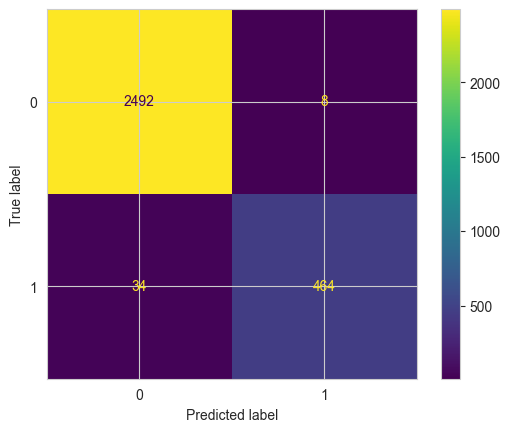

In [73]:
cm = confusion_matrix(y_test, y_pred_ranfor_1, labels= ranfor_clf_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ranfor_clf_1.classes_)

disp.plot(values_format= "")
plt.show()

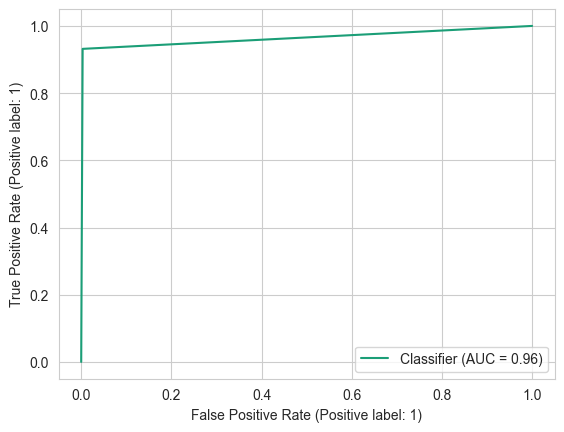

roc_auc_score: 0.9643


In [74]:
RocCurveDisplay.from_predictions(y_test, y_pred_ranfor_1)
plt.show()

print("roc_auc_score:", round(roc_auc_score(y_test, y_pred_ranfor_1), 4))

In [75]:
target_names = ["Predicted wouldn't leave", "Predicted would leave"]

print(classification_report(y_test, y_pred_ranfor_1, target_names= target_names))

                          precision    recall  f1-score   support

Predicted wouldn't leave       0.99      1.00      0.99      2500
   Predicted would leave       0.98      0.93      0.96       498

                accuracy                           0.99      2998
               macro avg       0.98      0.96      0.97      2998
            weighted avg       0.99      0.99      0.99      2998



The classification report above shows that the random forest model achieved a precision of 98%, recall of 98%, f1-score of 98% (all weighted averages), and accuracy of 98%. That's a perfect model.

The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model’s performance on this data is representative of how it will perform on new, unseeen data.

### Feature engineering: Feature selection & Feature extraction
**To overcome potential data leakage**

In this case, it’s likely that the company won’t have satisfaction levels reported for all of its employees. It’s also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. You could proceed by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature overworked. It will be a binary variable.

In [76]:
df_enc_2 = df_enc.drop("satisfaction_level", axis= 1)

df_enc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   last_evaluation         11991 non-null  float64
 1   num_projects            11991 non-null  int64  
 2   average_monthly_hours   11991 non-null  int64  
 3   tenure_company          11991 non-null  int64  
 4   work_accident           11991 non-null  int64  
 5   employee_left           11991 non-null  int64  
 6   promotion_last_5years   11991 non-null  int64  
 7   salary                  11991 non-null  int8   
 8   department_IT           11991 non-null  uint8  
 9   department_RandD        11991 non-null  uint8  
 10  department_accounting   11991 non-null  uint8  
 11  department_hr           11991 non-null  uint8  
 12  department_management   11991 non-null  uint8  
 13  department_marketing    11991 non-null  uint8  
 14  department_product_mng  11991 non-null

`166.67` is approximately the average number of monthly hours for someone who works `50` weeks per year `5` days per week `8` hours per day.
You could define being overworked as working more than `167` hours per month on average.

In [77]:
df_enc_2["overworked"] = df_enc_2["average_monthly_hours"]

df_enc_2["overworked"] = (df_enc_2["overworked"] > 167).astype("int8")

df_enc_2 = df_enc_2.drop("average_monthly_hours", axis= 1)

df_enc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   last_evaluation         11991 non-null  float64
 1   num_projects            11991 non-null  int64  
 2   tenure_company          11991 non-null  int64  
 3   work_accident           11991 non-null  int64  
 4   employee_left           11991 non-null  int64  
 5   promotion_last_5years   11991 non-null  int64  
 6   salary                  11991 non-null  int8   
 7   department_IT           11991 non-null  uint8  
 8   department_RandD        11991 non-null  uint8  
 9   department_accounting   11991 non-null  uint8  
 10  department_hr           11991 non-null  uint8  
 11  department_management   11991 non-null  uint8  
 12  department_marketing    11991 non-null  uint8  
 13  department_product_mng  11991 non-null  uint8  
 14  department_sales        11991 non-null

In [78]:
df_enc_2["overworked"].value_counts(normalize= True) * 100

1    68.359603
0    31.640397
Name: overworked, dtype: float64

### **Modeling Approach [D]: Decision Tree model: Round 2**

#### Splitting the data into 75% training data & 25% testing data

In [79]:
X = df_enc_2.copy()

X = df_enc_2.drop("employee_left", axis= 1)

y = df_enc_2["employee_left"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 17)

#### Performing oversampling to the minority class to overcome the class imbalance
**From 20% to 50%**

In [81]:
# Initial class distribution in the training set
print("Original class distribution in training set:", Counter(y_train))

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy= 0.5, random_state= 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# New class distribution after resampling
print("Resampled class distribution in training set:", Counter(y_resampled))

Original class distribution in training set: Counter({0: 7500, 1: 1493})
Resampled class distribution in training set: Counter({0: 7500, 1: 3750})


#### Identifying the optimal decision tree model

In [82]:
tree_clf = DecisionTreeClassifier(random_state= 17)

cv_params = {"max_depth": [4, 5, 6, 7, 8, 9, 10, 11], "min_samples_leaf": [2, 3, 4, 5, 6, 7]}

scoring = ["f1", "precision", "recall", "accuracy", "roc_auc"]

tree_cv_2 = GridSearchCV(estimator= tree_clf, param_grid= cv_params, scoring= scoring, cv= 5, refit= "roc_auc", n_jobs= -1, verbose= 1)

In [83]:
%%time

tree_cv_2.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 422 ms
Wall time: 2.87 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
             refit='roc_auc',
             scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'],
             verbose=1)

In [84]:
print("Best Parameters for the Decision Tree Model:\n", tree_cv_2.best_params_)

print("\nBest Avgerage Cross-validation ROC-AUC-score:", "%.3f" % tree_cv_2.best_score_)

Best Parameters for the Decision Tree Model:
 {'max_depth': 9, 'min_samples_leaf': 5}

Best Avgerage Cross-validation ROC-AUC-score: 0.967


In [85]:
decision_tree_results_2 = make_results("Decision Tree CV 2", tree_cv_2, "auc")

print(decision_tree_results, "\n")
print(decision_tree_results_2)

              Model  Precision    Recall        F1  Accuracy       AUC
0  Decision Tree CV   0.981662  0.912267  0.945675  0.965067  0.976751 

                Model  Precision  Recall        F1  Accuracy       AUC
0  Decision Tree CV 2   0.936856   0.908  0.922045    0.9488  0.966964


**Some of the other scores fell. That’s to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.**

#### Instantiating and fitting the optimal decision tree model

In [86]:
%%time

tree_clf_2 = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 3, random_state= 17)

tree_clf_2.fit(X_resampled, y_resampled)

CPU times: total: 0 ns
Wall time: 14.9 ms


DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, random_state=17)

In [87]:
y_pred_tree_2 = tree_clf_2.predict(X_test)

#### Evaluating the decision tree model

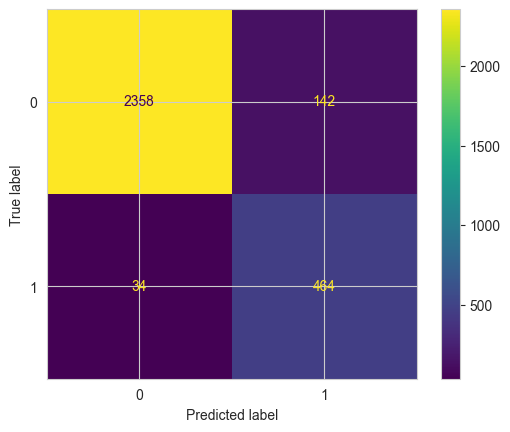

In [88]:
cm = confusion_matrix(y_test, y_pred_tree_2, labels= tree_clf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= tree_clf_2.classes_)

disp.plot(values_format= "")
plt.show()

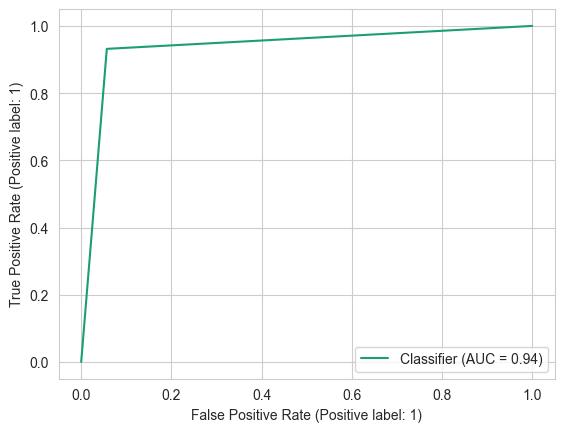

roc_auc_score: 0.9375


In [89]:
RocCurveDisplay.from_predictions(y_test, y_pred_tree_2)
plt.show()

print("roc_auc_score:", round(roc_auc_score(y_test, y_pred_tree_2), 4))

In [90]:
target_names = ["Predicted wouldn't leave", "Predicted would leave"]

print(classification_report(y_test, y_pred_tree_2, target_names= target_names))

                          precision    recall  f1-score   support

Predicted wouldn't leave       0.99      0.94      0.96      2500
   Predicted would leave       0.77      0.93      0.84       498

                accuracy                           0.94      2998
               macro avg       0.88      0.94      0.90      2998
            weighted avg       0.95      0.94      0.94      2998



#### Decision tree splits & feature importance

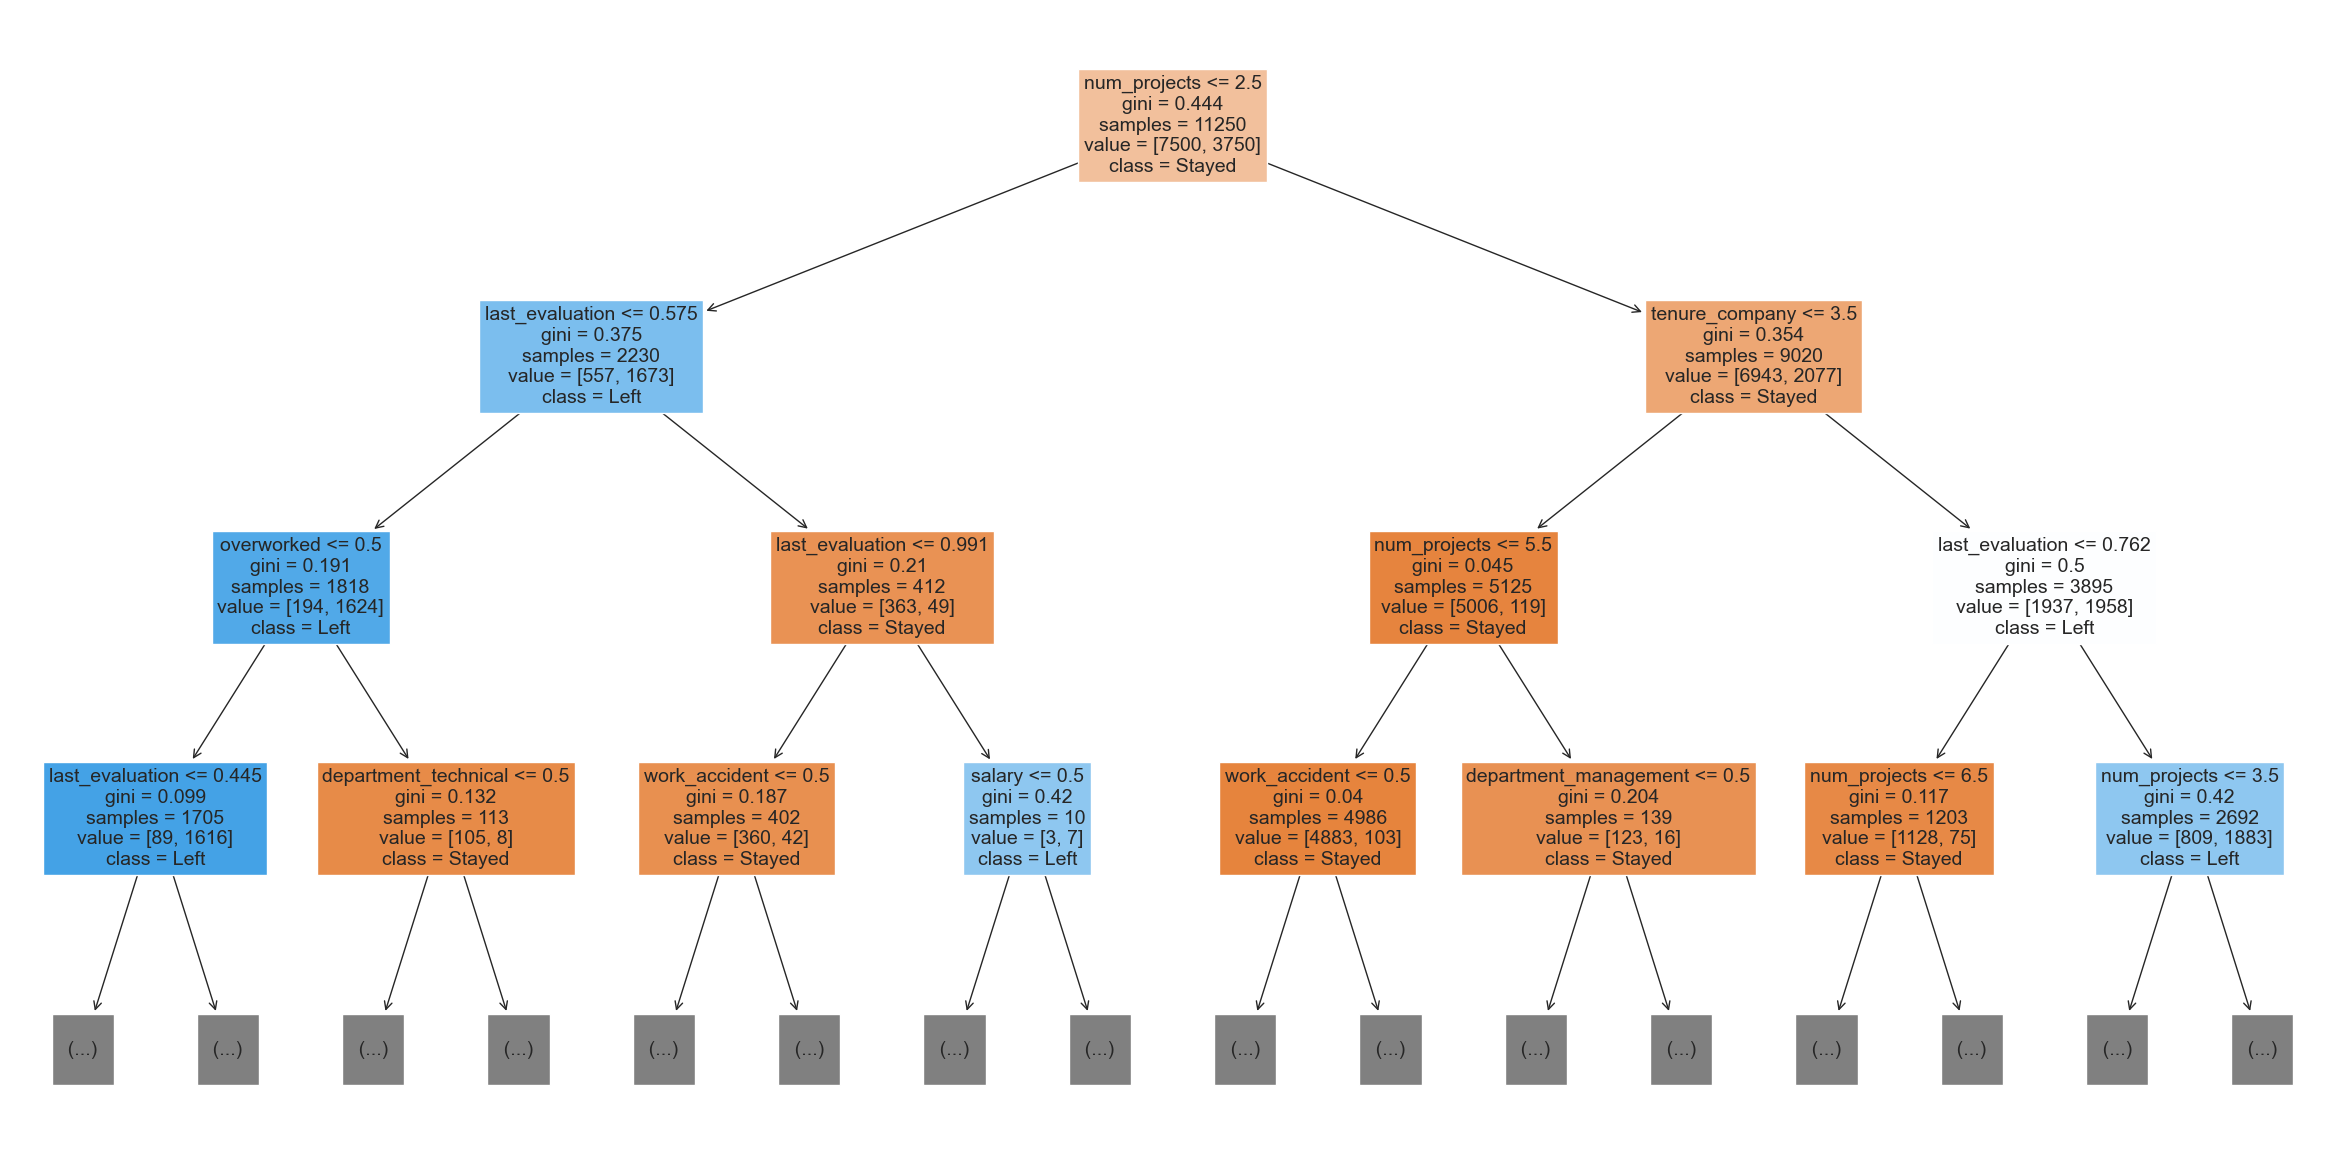

In [116]:
plt.figure(figsize= (30, 15))
plot_tree(tree_clf_2, max_depth= 3, fontsize= 14, feature_names= list(X.columns), class_names= ["Stayed", "Left"], filled= True)
plt.show()

In [117]:
tree2_importances = pd.DataFrame(tree_clf_2.feature_importances_ * 100, columns= ["gini_importance"], index= list(X.columns))

tree2_importances = tree2_importances[tree2_importances["gini_importance"] > 0.1].sort_values(by= "gini_importance", ascending= False)

tree2_importances

gini_importance
num_projects            32.539490
last_evaluation         29.865184
tenure_company          28.883494
overworked               7.909430
salary                   0.270765
department_sales         0.144894

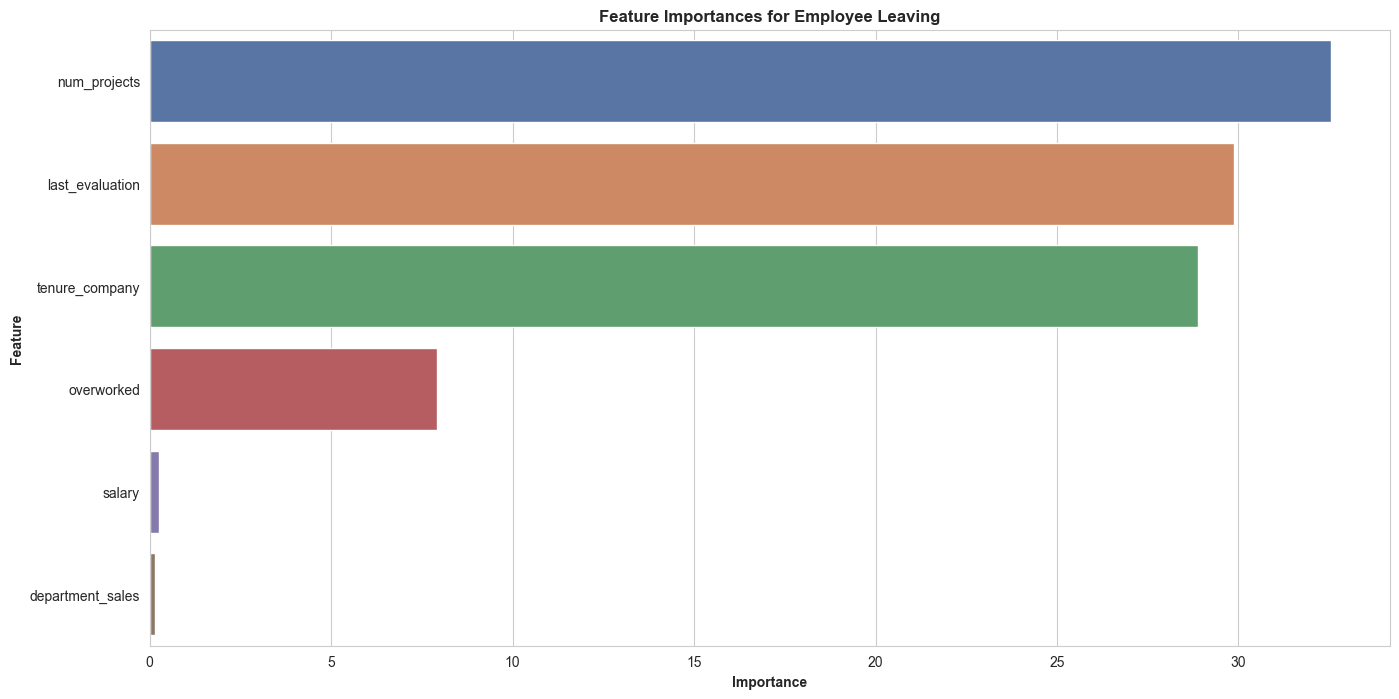

In [118]:
plt.figure(figsize= (16, 8))
sns.barplot(data= tree2_importances, x= "gini_importance", y= tree2_importances.index, palette= "deep", orient= "h")

plt.title("Feature Importances for Employee Leaving", fontweight= "bold")
plt.ylabel("Feature", fontweight= "bold")
plt.xlabel("Importance", fontweight= "bold")
plt.show()

**The barplot above shows that in this decision tree model, tenure_company, number_project, last_evaluation, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable `employee_left`.**

### **Modeling Approach [E]: Random Forest model: Round 2**

#### Splitting the data into 75% training data & 25% testing data

In [94]:
X = df_enc_2.copy()

X = df_enc_2.drop("employee_left", axis= 1)

y = df_enc_2["employee_left"]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 17)

#### Performing oversampling to the minority class to overcome the class imbalance
**From 20% to 50%**

In [96]:
# Initial class distribution in the training set
print("Original class distribution in training set:", Counter(y_train))

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy= 0.5, random_state= 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# New class distribution after resampling
print("Resampled class distribution in training set:", Counter(y_resampled))

Original class distribution in training set: Counter({0: 7500, 1: 1493})
Resampled class distribution in training set: Counter({0: 7500, 1: 3750})


#### Identifying the optimal random forest model

In [97]:
ranfor_clf = RandomForestClassifier(random_state= 17)

cv_params = {"max_depth": [4, 5, 6, 7, 8, 9, 10, 11], "min_samples_leaf": [2, 3, 4, 5, 6, 7],\
             "max_features": [0.6, 0.8, 1], "max_samples": [0.6, 0.8, 1], "n_estimators": [100, 150, 200, 250]}

scoring = ["f1", "precision", "recall", "accuracy", "roc_auc"]

ranfor_cv_2 = GridSearchCV(estimator= ranfor_clf, param_grid= cv_params, scoring= scoring, cv= 5, refit= "roc_auc", n_jobs= -1, verbose= 1)

In [98]:
#%%time

#ranfor_cv_2.fit(X_resampled, y_resampled)

In [99]:
# Write Pickle
#write_pickle(path, ranfor_cv_2, "hr_ranfor_cv_2")

In [100]:
# Read Pickle
ranfor_cv_2 = read_pickle(path, "hr_ranfor_cv_2")

In [101]:
print("Best Parameters for the Decision Tree Model:\n", ranfor_cv_2.best_params_)

print("\nBest Avgerage Cross-validation ROC-AUC-score:", "%.3f" % ranfor_cv_2.best_score_)

Best Parameters for the Decision Tree Model:
 {'max_depth': 11, 'max_features': 0.6, 'max_samples': 0.8, 'min_samples_leaf': 2, 'n_estimators': 250}

Best Avgerage Cross-validation ROC-AUC-score: 0.982


In [102]:
random_forest_results_2 = make_results("Random Forest CV 2", ranfor_cv_2, "auc")

print(random_forest_results, "\n")
print(random_forest_results_2)

              Model  Precision    Recall        F1  Accuracy       AUC
0  Random Forest CV   0.992261  0.922179  0.955911  0.971664  0.991155 

                Model  Precision    Recall        F1  Accuracy      AUC
0  Random Forest CV 2   0.961508  0.911839  0.935994  0.958454  0.98236


**Again, the scores dropped slightly, but the random forest performs better than the decision tree if 
using AUC as the deciding metric**.

#### Instantiating and fitting the optimal random forest model

In [103]:
%%time

ranfor_clf_2 = RandomForestClassifier(max_depth= 11, min_samples_leaf= 2, n_estimators= 250, max_features= 0.6, max_samples= 0.8, random_state= 17)

ranfor_clf_2.fit(X_resampled, y_resampled)

CPU times: total: 1.72 s
Wall time: 1.75 s


RandomForestClassifier(max_depth=11, max_features=0.6, max_samples=0.8,
                       min_samples_leaf=2, n_estimators=250, random_state=17)

In [104]:
y_pred_ranfor_2 = ranfor_clf_2.predict(X_test)

#### Evaluating the random forest model

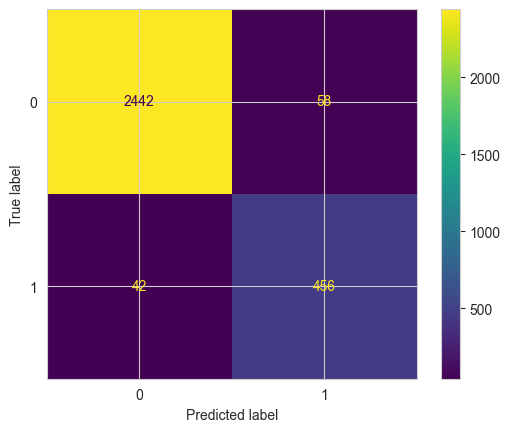

In [105]:
cm = confusion_matrix(y_test, y_pred_ranfor_2, labels= ranfor_clf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ranfor_clf_2.classes_)

disp.plot(values_format= "")
plt.show()

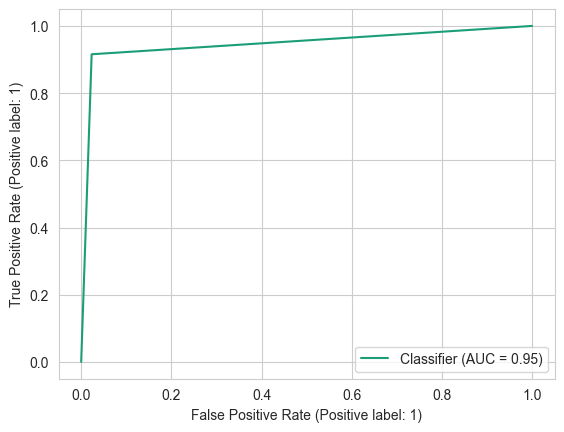

roc_auc_score: 0.9462


In [106]:
RocCurveDisplay.from_predictions(y_test, y_pred_ranfor_2)
plt.show()

print("roc_auc_score:", round(roc_auc_score(y_test, y_pred_ranfor_2), 4))

In [107]:
target_names = ["Predicted wouldn't leave", "Predicted would leave"]

print(classification_report(y_test, y_pred_ranfor_2, target_names= target_names))

                          precision    recall  f1-score   support

Predicted wouldn't leave       0.98      0.98      0.98      2500
   Predicted would leave       0.89      0.92      0.90       498

                accuracy                           0.97      2998
               macro avg       0.94      0.95      0.94      2998
            weighted avg       0.97      0.97      0.97      2998



The model predicts more false positives than false negatives, which means that some employees 
may be identified as at risk of quitting or getting fired, when that’s actually not the case. But thi 
is still a strong model.
For exploratory purpose, you might want to inspect the splits of the decision tree model and  he
most important features in the random forest model

#### Random forest feature importance

In [108]:
feature_importances = ranfor_clf_2.feature_importances_

feature_importances

array([0.23669476, 0.32427812, 0.31044662, 0.0137221 , 0.000328  ,
       0.0107155 , 0.00119605, 0.00094011, 0.00078215, 0.00182195,
       0.00091487, 0.00036825, 0.00074374, 0.00368202, 0.00302678,
       0.00321283, 0.08712615])

In [109]:
forest2_importances = pd.DataFrame(list(X.columns), columns= ["feature"])

forest2_importances["importance"] = feature_importances * 100

forest2_importances = forest2_importances[forest2_importances["importance"] > 0.5].sort_values(by= "importance", ascending= False)

forest2_importances

feature  importance
1      num_projects   32.427812
2    tenure_company   31.044662
0   last_evaluation   23.669476
16       overworked    8.712615
3     work_accident    1.372210
5            salary    1.071550

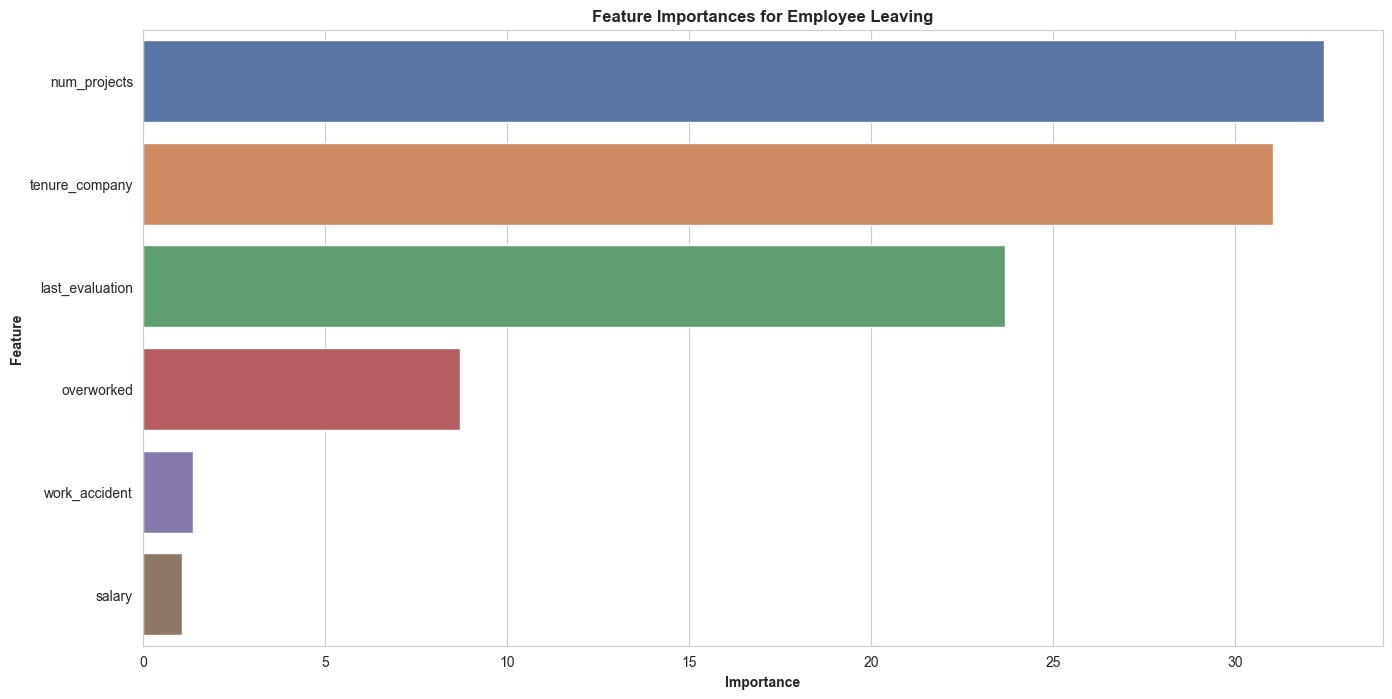

In [110]:
plt.figure(figsize= (16, 8))
sns.barplot(data= forest2_importances, x= "importance", y= "feature", palette= "deep", orient= "h")

plt.title("Feature Importances for Employee Leaving", fontweight= "bold")
plt.ylabel("Feature", fontweight= "bold")
plt.xlabel("Importance", fontweight= "bold")
plt.show()

The plot above shows that in this random forest model, number_project, tenure_company, last_evaluation, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `employee_left`, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage

## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

## Step 4. Results and Evaluation

### Summary of model results

**Logistic Regression**
The logistic regression model achieved precision of 86%, recall of 86%, f1-score of 86% (all weighted averages), and accuracy of 86%, on the test set.

**Tree-based Machine Learning**
After conducting feature engineering, the decision tree model achieved AUC of 94%, precision of 96%, recall of 96%, f1-score of 96%, and accuracy of 96%, on the test set. The random forest model achieved the same evaluation metrics as the decision tree model.

### Conclusion, Recommendations

**The models and the feature importances extracted from the models confirm that employees at the company are overworked.**

To retain employees, the following recommendations could be presented to the stakeholders:
1. Cap the number of projects that employees can work on.
2. Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
3. Either reward employees for working longer hours, or don’t require them to do so.
4. If employees aren’t familiar with the company’s overtime pay policies, inform them about this. If the expectations around workload and time off aren’t explicit, make them clear.
5. Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
6. High evaluation scores should not be reserved for employees who work 200+ hours per month. 
Consider a proportionate scale for rewarding employees who contribute more/put in mor 
effort.